<a href="https://colab.research.google.com/github/Ashubapun/Topic_Modelling/blob/main/Topic_Modelling(Tfid%2Cword2vec_%2B_spectral).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Restart the kernel after first download
!pip install pyLDAvis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
import nltk

In [ ]:
tweets = pd.read_csv('/content/tweets_cleaned_13_04_23.csv')
tweets

,Unnamed: 0,Tweet,Hashtag
0,0,effect of anthocyanins on gut health markers f...,health
1,1,good news recently accept position as software...,health
2,2,start keto this month eat about lbs of pork be...,health
3,3,be healthy mean get whole lot more out of life...,health
4,4,butterfly welcome the feed govt announcement o...,health
...,...,...,...
17634,18496,the pakistan women football team have be annou...,sports
17635,18497,big ant studios and nacon cricket the official...,sports
17636,18498,list of injure players in ipl be increase day ...,sports
17637,18499,sport sponsorship cricket especially ipl domin...,sports


In [ ]:
tweets['Hashtag'].value_counts()

Hashtag
politics    4910
health      4404
sports      4167
tech        4158
Name: count, dtype: int64

In [ ]:
tweets_y = tweets['Hashtag']
tweets_y

0        health
1        health
2        health
3        health
4        health
          ...  
17634    sports
17635    sports
17636    sports
17637    sports
17638    sports
Name: Hashtag, Length: 17639, dtype: object

In [ ]:
tweets_x = tweets.drop(columns = 'Hashtag')
tweets_x

,Unnamed: 0,Tweet
0,0,effect of anthocyanins on gut health markers f...
1,1,good news recently accept position as software...
2,2,start keto this month eat about lbs of pork be...
3,3,be healthy mean get whole lot more out of life...
4,4,butterfly welcome the feed govt announcement o...
...,...,...
17634,18496,the pakistan women football team have be annou...
17635,18497,big ant studios and nacon cricket the official...
17636,18498,list of injure players in ipl be increase day ...
17637,18499,sport sponsorship cricket especially ipl domin...


In [ ]:
# label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tweets_y = le.fit_transform(tweets_y)

In [ ]:
tweets_y

array([0, 0, 0, ..., 2, 2, 2])

# Lower Casing

In [ ]:
tweets_x['Tweet'] = tweets_x['Tweet'].str.lower()

In [ ]:
tweets_x

,Unnamed: 0,Tweet
0,0,effect of anthocyanins on gut health markers f...
1,1,good news recently accept position as software...
2,2,start keto this month eat about lbs of pork be...
3,3,be healthy mean get whole lot more out of life...
4,4,butterfly welcome the feed govt announcement o...
...,...,...
17634,18496,the pakistan women football team have be annou...
17635,18497,big ant studios and nacon cricket the official...
17636,18498,list of injure players in ipl be increase day ...
17637,18499,sport sponsorship cricket especially ipl domin...


# Removing html tags and urls

In [ ]:
import re
def remove_tags_url(text):
  #pattern = re.compile("!#$%&'*+-.^_`|~:")
  pattern = re.compile(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')
  return pattern.sub(r'',text)


In [ ]:
tweets_x['Tweet'].apply(remove_tags_url)

0        effect of anthocyanins on gut health markers f...
1        good news recently accept position as software...
2        start keto this month eat about lbs of pork be...
3        be healthy mean get whole lot more out of life...
4        butterfly welcome the feed govt announcement o...
                               ...                        
17634    the pakistan women football team have be annou...
17635    big ant studios and nacon cricket the official...
17636    list of injure players in ipl be increase day ...
17637    sport sponsorship cricket especially ipl domin...
17638    𝙉𝙀𝙒 𝙅𝙊𝘽 𝘼𝙇𝙀𝙍𝙏 aston villa fc lead sport therap...
Name: Tweet, Length: 17639, dtype: object

# Remove Punctuations

In [ ]:
import string
exclude = string.punctuation
def remove_punc(text):
  for char in exclude:
    text = text.replace(char, "")
  return text

In [ ]:
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# or use standard technique
def remove_punctuations(text):
  return text.translate(str.maketrans(" "," ", exclude))

In [ ]:
tweets_x['Tweet'].apply(remove_punctuations)

0        effect of anthocyanins on gut health markers f...
1        good news recently accept position as software...
2        start keto this month eat about lbs of pork be...
3        be healthy mean get whole lot more out of life...
4        butterfly welcome the feed govt announcement o...
                               ...                        
17634    the pakistan women football team have be annou...
17635    big ant studios and nacon cricket the official...
17636    list of injure players in ipl be increase day ...
17637    sport sponsorship cricket especially ipl domin...
17638    𝙉𝙀𝙒 𝙅𝙊𝘽 𝘼𝙇𝙀𝙍𝙏 aston villa fc lead sport therap...
Name: Tweet, Length: 17639, dtype: object

In [ ]:
tweets_x.head()

,Unnamed: 0,Tweet
0,0,effect of anthocyanins on gut health markers f...
1,1,good news recently accept position as software...
2,2,start keto this month eat about lbs of pork be...
3,3,be healthy mean get whole lot more out of life...
4,4,butterfly welcome the feed govt announcement o...


# Chat word Treatment

In [ ]:
def chat_conversion(text):
  chat_words = {}
  new_text = []
  for i in text.split():
    if i in chat_words:
      new_text.append(chat_words[i])
    else:
      new_text.append(i)

  return " ".join(new_text)

# Spelling Correction

In [ ]:
from textblob import TextBlob
def spell_check(text):
    for word in text.split():
      textblob = TextBlob(text = text)
      return textblob.correct().string

# Remove Stopwords

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

def remove_stopwords(text):
  new_text = []
  for word in text.split():
    if word in stopwords.words('english'):
      new_text.append("")
    else:
      new_text.append(word)

  x = new_text[:]
  new_text.clear()
  return " ".join(x)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
tweets_x['Tweet'] = tweets_x['Tweet'].apply(remove_stopwords)

# Tokenization

In [ ]:
# import spacy
# nlp = spacy.load('en_core_web_sm')
# doc = nlp(text)
# for token in doc:
#   print(token)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# from nltk.tokenize import word_tokenize, sent_tokenize, wordpunct_tokenize
# for i in tweets_x['Tweet']:
#   words = [w for w in nltk.tokenize.word_tokenize(i)]
#   words = [le]

# tweets_x['Tweet'] = tweets_x['Tweet'].apply(wordpunct_tokenize)

In [ ]:
from nltk.tokenize import word_tokenize
tweets_x['Tweet'] = tweets_x['Tweet'].apply(word_tokenize)

In [ ]:
tweets_x

,Unnamed: 0,Tweet
0,0,"[effect, anthocyanins, gut, health, markers, f..."
1,1,"[good, news, recently, accept, position, softw..."
2,2,"[start, keto, month, eat, lbs, pork, belly, do..."
3,3,"[healthy, mean, get, whole, lot, life, positiv..."
4,4,"[butterfly, welcome, feed, govt, announcement,..."
...,...,...
17634,18496,"[pakistan, women, football, team, announce, fi..."
17635,18497,"[big, ant, studios, nacon, cricket, official, ..."
17636,18498,"[list, injure, players, ipl, increase, day, da..."
17637,18499,"[sport, sponsorship, cricket, especially, ipl,..."


# Lemmatization

In [ ]:
tweets_x['Tweet'] = [','.join(map(str, l)) for l in tweets_x['Tweet']]

In [ ]:
# Lemmatizing using Wordnet Lemmatizer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatize = WordNetLemmatizer()
tweets_x['Tweet'].apply(wordnet_lemmatize.lemmatize)

[nltk_data] Downloading package wordnet to /root/nltk_data...


0        effect,anthocyanins,gut,health,markers,firmicu...
1        good,news,recently,accept,position,software,de...
2        start,keto,month,eat,lbs,pork,belly,dozen,egg,...
3        healthy,mean,get,whole,lot,life,positive,menta...
4        butterfly,welcome,feed,govt,announcement,milli...
                               ...                        
17634    pakistan,women,football,team,announce,first,ro...
17635    big,ant,studios,nacon,cricket,official,game,as...
17636    list,injure,players,ipl,increase,day,day,know,...
17637    sport,sponsorship,cricket,especially,ipl,domin...
17638    𝙉𝙀𝙒,𝙅𝙊𝘽,𝘼𝙇𝙀𝙍𝙏,aston,villa,fc,lead,sport,therap...
Name: Tweet, Length: 17639, dtype: object

In [ ]:
# import nltk
# nltk.download('punkt')
# for i in tweets_x['Tweet']:
#   words = [w for w in nltk.tokenize.word_tokenize(i)]
#   words = [wordnet_lemmatize(w) for w in words if len(w)>2]

In [ ]:
tweets_x['Tweet'].shape[0]

17639

In [ ]:
x = []
for i in range(tweets_x['Tweet'].shape[0]):
  y = tweets_x['Tweet'][i].split(',')
  x.append(y)

print(x)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
corpus = x
len(corpus)

17639

In [ ]:
# nested list to one flat list
def flat(lis):
    flatList = []
    # Iterate with outer list
    for element in lis:
        if type(element) is list:
            # Check if type is list than iterate through the sublist
            for item in element:
                flatList.append(item)
        else:
            flatList.append(element)
    return flatList

In [ ]:
x = set(flat(x))
len(x)

33106

In [ ]:
x = list(x)

# Vectorization

In [ ]:
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD

# !pip install pyLDAvis

import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_notebook

# TF-IDF + Spectral Clustering

In [ ]:
## Building TFIDF model for text vectorization on the corpus

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)

In [ ]:
X.shape

(33106, 33106)

In [ ]:
vectorizer.vocabulary_

In [ ]:
sum(list(vectorizer.vocabulary_.values()))

547987065

In [ ]:
words = list(vectorizer.vocabulary_.keys())
words

In [ ]:
## Using Truncated SVD to reduce the dimension of the original matrix

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50, random_state = 42)
svd_tfidf = svd.fit_transform(X)
#X = svd_tfidf

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 50)
# X = pca.fit_transform(X)
# X

In [ ]:
# using tsne to reduce the dimension to 2

from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose = 1, random_state = 21, n_iter=500)
tsne_tfidf = tsne_model.fit_transform(svd_tfidf)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 33106 samples in 0.002s...
[t-SNE] Computed neighbors for 33106 samples in 8.095s...
[t-SNE] Computed conditional probabilities for sample 1000 / 33106
[t-SNE] Computed conditional probabilities for sample 2000 / 33106
[t-SNE] Computed conditional probabilities for sample 3000 / 33106
[t-SNE] Computed conditional probabilities for sample 4000 / 33106
[t-SNE] Computed conditional probabilities for sample 5000 / 33106
[t-SNE] Computed conditional probabilities for sample 6000 / 33106
[t-SNE] Computed conditional probabilities for sample 7000 / 33106
[t-SNE] Computed conditional probabilities for sample 8000 / 33106
[t-SNE] Computed conditional probabilities for sample 9000 / 33106
[t-SNE] Computed conditional probabilities for sample 10000 / 33106
[t-SNE] Computed conditional probabilities for sample 11000 / 33106
[t-SNE] Computed conditional probabilities for sample 12000 / 33106
[t-SNE] Computed conditional probabilities for sam

KeyboardInterrupt: ignored

In [ ]:
# creating a dataframe of the word with its 2d vector form
df1 = pd.DataFrame(tsne_tfidf, columns = ['x', 'y'])
df1['word'] = words

In [ ]:
#Standard code for visualization
output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600,
                       title="tf-idf clustering of the Tweet",
    tools="pan,wheel_zoom,box_zoom,reset,hover,save",
    x_axis_type=None, y_axis_type=None, min_border=1)

In [ ]:
plot_tfidf.scatter(x='x', y='y', source=df1, alpha=0.7)
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"Word": "@word"}
show(plot_tfidf)

In [ ]:
# Clustering our model using spectral clustering
from sklearn.cluster import SpectralClustering
# Creating clustering object of Spectral Clustering
clustering = SpectralClustering(n_clusters=4,assign_labels='cluster_qr',random_state=0, affinity='nearest_neighbors', n_neighbors=10, n_jobs = -1)
clustering.fit(X)
clustering.labels_

In [ ]:
# Labeling the words to their respective clusters

df1['clusters'] = clustering.labels_
df1

In [ ]:
df1['clusters'].value_counts()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Visualizing the Spectral Clusters
SpectralClustering(coef0=1, degree=3,
                   eigen_solver='arpack', eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=4, n_components=None,
                   n_init=10, n_jobs=None, random_state=None)
labels = clustering.labels_

plt.scatter(df1['x'],df1['y'], c=labels)
plt.show()

In [ ]:
# word cloud  after clustering
# word cloud of cluster 0
from wordcloud import WordCloud
wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color='black')
cl0 = wc.generate(df1[df1['clusters'] == 0]['word'].str.cat(sep = ' '))
plt.imshow(cl0)

In [ ]:
# word cloud of cluster 1
wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color='black')
cl1 = wc.generate(df1[df1['clusters'] == 1]['word'].str.cat(sep = ' '))
plt.imshow(cl1)

In [ ]:
# word cloud of cluster 2
wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color='black')
cl2 = wc.generate(df1[df1['clusters'] == 2]['word'].str.cat(sep = ' '))
plt.imshow(cl2)

In [ ]:
# word cloud of cluster 3
wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color='black')
cl3 = wc.generate(df1[df1['clusters'] == 3]['word'].str.cat(sep = ' '))
plt.imshow(cl3)

# Word2Vec + Spectral Clustering



In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## Building Word2Vec model for text vectorization on the corpus

import gensim
model = gensim.models.Word2Vec(window = 10, min_count = 4, workers = 4, vector_size = 300, sg = 1)
model.build_vocab(corpus)

In [ ]:
model.corpus_count, model.epochs

(17639, 5)

In [ ]:
# getting the vector form of the words
vector = model.wv.vectors
vector.shape

(8607, 300)

In [ ]:
vector

array([[-1.7874241e-04,  7.8810452e-05,  1.7011166e-03, ...,
         1.7086347e-04,  2.7376947e-03, -2.3396802e-03],
       [-2.7475592e-03,  3.0997850e-03, -6.5886976e-05, ...,
        -2.8973406e-03,  9.8717213e-04, -2.2252994e-03],
       [ 2.7107573e-03, -1.4857781e-03, -3.5611907e-04, ...,
         2.3727485e-03,  1.9638126e-03, -1.8602058e-03],
       ...,
       [-2.0577712e-03, -3.2915901e-03,  8.6013676e-04, ...,
        -2.6501939e-03,  3.1009007e-03, -1.1429851e-03],
       [-2.4276965e-03,  3.0821343e-03,  3.2919112e-03, ...,
         2.9036966e-03, -2.1665888e-03, -1.7421086e-03],
       [ 1.8660387e-04,  1.7372834e-03, -3.2084684e-03, ...,
        -1.5871513e-03,  2.3921232e-03, -1.0930077e-03]], dtype=float32)

In [ ]:
# training the model on the corpus
model.train(x, total_examples = model.corpus_count, epochs = model.epochs)

(0, 1299650)

In [ ]:
# getting the normalized vector form
model.wv.get_normed_vectors()

array([[-0.005419  ,  0.00238933,  0.0515734 , ...,  0.00518013,
         0.08299973, -0.07093298],
       [-0.07970168,  0.0899191 , -0.00191126, ..., -0.08404656,
         0.02863606, -0.06455187],
       [ 0.08337511, -0.04569827, -0.0109532 , ...,  0.07297893,
         0.06040124, -0.05721459],
       ...,
       [-0.06314882, -0.10101222,  0.02639585, ..., -0.08132906,
         0.09516034, -0.03507589],
       [-0.0695143 ,  0.08825338,  0.0942601 , ...,  0.08314402,
        -0.06203778, -0.04988328],
       [ 0.00560334,  0.05216712, -0.09634384, ..., -0.04765895,
         0.07183064, -0.03282082]], dtype=float32)

In [ ]:
model.wv.get_normed_vectors().shape

(8607, 300)

In [ ]:
y = model.wv.index_to_key
y

In [ ]:
len(y)

8607

In [ ]:
## Using Truncated SVD to reduce the dimension of the original matrix

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state = 42)
svd_w2v = svd.fit_transform(vector)
X = svd_w2v

In [ ]:
## Using PCA for dimensionality Reduction

# from sklearn.decomposition import PCA
# pca = PCA(n_components = 50)
# X = pca.fit_transform(vector)
# X

In [ ]:
# using tsne to reduce the dimension to 2
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose = 1, random_state = 21, n_iter=500)
tsne_w2v = tsne_model.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8607 samples in 0.001s...
[t-SNE] Computed neighbors for 8607 samples in 1.514s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8607
[t-SNE] Computed conditional probabilities for sample 2000 / 8607
[t-SNE] Computed conditional probabilities for sample 3000 / 8607
[t-SNE] Computed conditional probabilities for sample 4000 / 8607
[t-SNE] Computed conditional probabilities for sample 5000 / 8607
[t-SNE] Computed conditional probabilities for sample 6000 / 8607
[t-SNE] Computed conditional probabilities for sample 7000 / 8607
[t-SNE] Computed conditional probabilities for sample 8000 / 8607
[t-SNE] Computed conditional probabilities for sample 8607 / 8607
[t-SNE] Mean sigma: 0.004900
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.330780
[t-SNE] KL divergence after 500 iterations: 4.840480


In [ ]:
tsne_w2v

array([[ 2.3615437 ,  0.36298943],
       [ 0.6337059 ,  4.1335106 ],
       [ 2.9541152 , -1.3983902 ],
       ...,
       [-1.7568411 , -0.48937273],
       [-6.4025507 ,  1.3039175 ],
       [ 5.285326  ,  0.03641916]], dtype=float32)

In [ ]:
# creating a dataframe of the word with its 2d vector form
df = pd.DataFrame(tsne_w2v, columns = ['x', 'y'])
df['word'] = y

In [ ]:
df

,x,y,word
0,2.361544,0.362989,politics
1,0.633706,4.133511,health
2,2.954115,-1.398390,technology
3,-1.705638,1.649182,amp
4,-3.241361,-3.198820,sport
...,...,...,...
8602,0.593632,5.596040,fitnessafter
8603,3.575907,1.279211,uspol
8604,-1.756841,-0.489373,almonds
8605,-6.402551,1.303918,bean


In [ ]:
#Standard code for visualization

output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600,
                       title="tf-idf clustering of the Tweet",
    tools="pan,wheel_zoom,box_zoom,reset,hover,save",
    x_axis_type=None, y_axis_type=None, min_border=1)

In [ ]:
plot_tfidf.scatter(x='x', y='y', source=df, alpha=0.7)
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"Word": "@word"}
show(plot_tfidf)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Clustering our model using spectral clustering
from sklearn.cluster import SpectralClustering

# Creating clustering object of Spectral Clustering
clustering = SpectralClustering(n_clusters=4,assign_labels='cluster_qr',random_state=0, affinity='nearest_neighbors', n_neighbors=10)
clustering.fit(tsne_w2v)
clustering.labels_

array([2, 3, 1, ..., 2, 0, 1])

In [ ]:
# Labeling the words to their respective clusters
df['clusters'] = clustering.labels_
df

,x,y,word,clusters
0,2.361544,0.362989,politics,2
1,0.633706,4.133511,health,3
2,2.954115,-1.398390,technology,1
3,-1.705638,1.649182,amp,2
4,-3.241361,-3.198820,sport,0
...,...,...,...,...
8602,0.593632,5.596040,fitnessafter,3
8603,3.575907,1.279211,uspol,1
8604,-1.756841,-0.489373,almonds,2
8605,-6.402551,1.303918,bean,0


In [ ]:
df['clusters'].value_counts()

clusters
2    2637
1    2142
3    2015
0    1813
Name: count, dtype: int64

In [ ]:
len(y), len(X)

(8607, 8607)

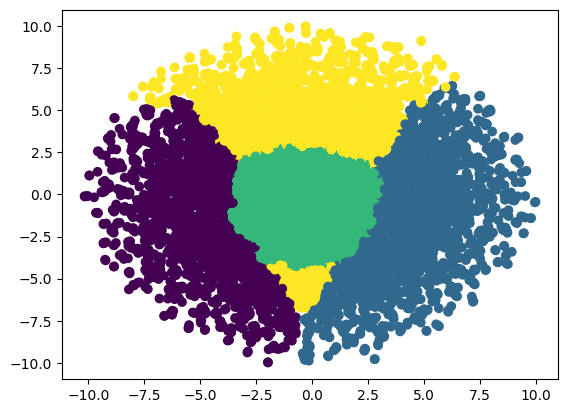

In [ ]:
# Visualizing the Spectral Clusters
SpectralClustering(coef0=1, degree=3,
                   eigen_solver='amg', eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=4, n_components=None,
                   n_init=10, n_jobs=None, random_state=None)
labels = clustering.labels_

plt.scatter(df['x'],df['y'], c=labels)
plt.show()

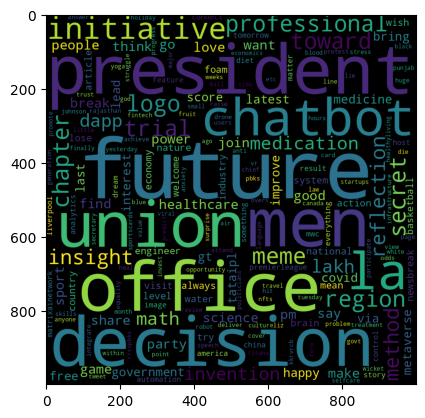

In [ ]:
# word cloud  after clustering

# word cloud of cluster 0
from wordcloud import WordCloud
wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color='black')
cl0 = wc.generate(df[df['clusters'] == 0]['word'].str.cat(sep = ' '))
plt.imshow(cl0)

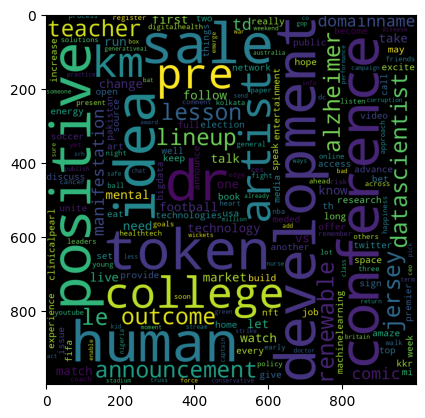

In [ ]:
# word cloud of cluster 1
from wordcloud import WordCloud
wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color='black')
cl1 = wc.generate(df[df['clusters'] == 1]['word'].str.cat(sep = ' '))
plt.imshow(cl1)

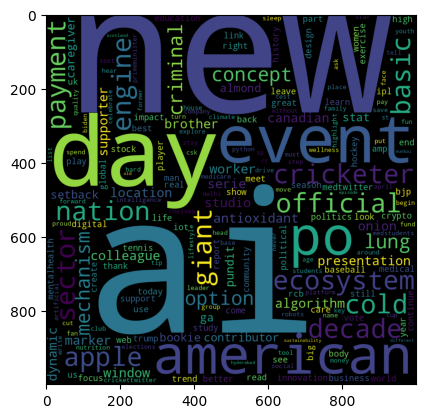

In [ ]:
# word cloud of cluster 2
from wordcloud import WordCloud
wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color='black')
cl2 = wc.generate(df[df['clusters'] == 2]['word'].str.cat(sep = ' '))
plt.imshow(cl2)

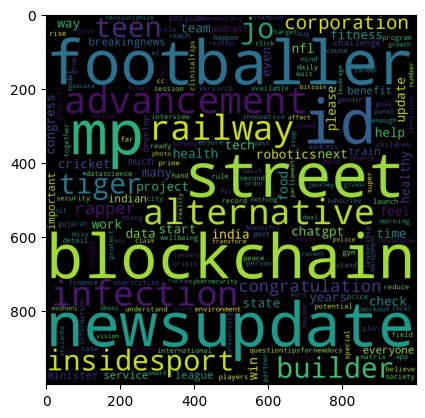

In [ ]:
# word cloud of cluster 3
from wordcloud import WordCloud
wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color='black')
cl3 = wc.generate(df[df['clusters'] == 3]['word'].str.cat(sep = ' '))
plt.imshow(cl3)

most 20 similar words


In [ ]:
model.wv.most_similar('politics', topn = 20)

[('draw', 0.21598899364471436),
 ('one', 0.19780313968658447),
 ('biggest', 0.19374991953372955),
 ('shubmangill', 0.18435832858085632),
 ('danceyourlife', 0.1826939582824707),
 ('women', 0.18215586245059967),
 ('nftesports', 0.18199634552001953),
 ('deep', 0.17316539585590363),
 ('auto', 0.1724252998828888),
 ('rrvsdc', 0.17223769426345825),
 ('host', 0.17018398642539978),
 ('louis', 0.16686159372329712),
 ('vefam', 0.16555030643939972),
 ('dangers', 0.16543924808502197),
 ('uddhavthackeray', 0.16521607339382172),
 ('slip', 0.16058605909347534),
 ('yfn', 0.15750733017921448),
 ('dedicate', 0.1566464751958847),
 ('babarazam𓃵', 0.15647152066230774),
 ('mw', 0.15627974271774292)]

In [ ]:
# Dictionary of 20 most similar words corresponding to each cluster
dic_words = {}
words_pol = []
words_sport = []
words_tech = []
words_health = []

for i in range(20):
 words_pol.append(model.wv.most_similar('politics', topn = 20)[i][0])
 dic_words['politics'] = words_pol

for i in range(20):
 words_sport.append(model.wv.most_similar('sport', topn = 20)[i][0])
 dic_words['sports'] = words_sport

for i in range(20):
 words_tech.append(model.wv.most_similar('technology', topn = 20)[i][0])
 dic_words['technology'] = words_tech

for i in range(20):
 words_health.append(model.wv.most_similar('health', topn = 20)[i][0])
 dic_words['health'] = words_health

print(dic_words)

{'politics': ['draw', 'one', 'biggest', 'shubmangill', 'danceyourlife', 'women', 'nftesports', 'deep', 'auto', 'rrvsdc', 'host', 'louis', 'vefam', 'dangers', 'uddhavthackeray', 'slip', 'yfn', 'dedicate', 'babarazam𓃵', 'mw'], 'sports': ['query', 'bc', 'northernireland', 'edge', 'difference', 'kidsmartialarts', 'bag', 'whitelist', 'six', 'draw', 'fluids', 'genius', 'mesmerize', 'gymnastics', 'minister', 'shakhtar', 'gmt', 'attendees', 'climb', 'sportnet'], 'technology': ['homeless', 'nlp', 'nottingham', 'valley', 'cdnpolitics', 'kingston', 'bj', 'mcwpakistan', 'raven', 'standard', 'cultural', 'thatcher', 'pathan', 'ghulamnabiazad', 'gujrattitans', 'translation', 'naturally', 'favorite', 'ou', 'dramatically'], 'health': ['personalities', 'perspectives', 'tight', 'manipulate', 'inpst', 'display', 'argue', 'saga', 'swedish', 'lawyers', 'cabinet', 'sandy', 'please', 'fanzone', 'institute', 'food', 'foodsecurity', 'conspiracy', 'icc', 'bt']}


In [ ]:
print(dic_words)

{'politics': ['draw', 'one', 'biggest', 'shubmangill', 'danceyourlife', 'women', 'nftesports', 'deep', 'auto', 'rrvsdc', 'host', 'louis', 'vefam', 'dangers', 'uddhavthackeray', 'slip', 'yfn', 'dedicate', 'babarazam𓃵', 'mw'], 'sports': ['query', 'bc', 'northernireland', 'edge', 'difference', 'kidsmartialarts', 'bag', 'whitelist', 'six', 'draw', 'fluids', 'genius', 'mesmerize', 'gymnastics', 'minister', 'shakhtar', 'gmt', 'attendees', 'climb', 'sportnet'], 'technology': ['homeless', 'nlp', 'nottingham', 'valley', 'cdnpolitics', 'kingston', 'bj', 'mcwpakistan', 'raven', 'standard', 'cultural', 'thatcher', 'pathan', 'ghulamnabiazad', 'gujrattitans', 'translation', 'naturally', 'favorite', 'ou', 'dramatically'], 'health': ['personalities', 'perspectives', 'tight', 'manipulate', 'inpst', 'display', 'argue', 'saga', 'swedish', 'lawyers', 'cabinet', 'sandy', 'please', 'fanzone', 'institute', 'food', 'foodsecurity', 'conspiracy', 'icc', 'bt']}


In [ ]:
len(corpus)

17639

In [ ]:
tweets['Tweet']

0        effect of anthocyanins on gut health markers f...
1        good news recently accept position as software...
2        start keto this month eat about lbs of pork be...
3        be healthy mean get whole lot more out of life...
4        butterfly welcome the feed govt announcement o...
                               ...                        
17634    the pakistan women football team have be annou...
17635    big ant studios and nacon cricket the official...
17636    list of injure players in ipl be increase day ...
17637    sport sponsorship cricket especially ipl domin...
17638    𝙉𝙀𝙒 𝙅𝙊𝘽 𝘼𝙇𝙀𝙍𝙏 aston villa fc lead sport therap...
Name: Tweet, Length: 17639, dtype: object

In [ ]:
# import collections

# filtered_words = corpus
# counted_words = collections.Counter(filtered_words)

# words = []
# counts = []
# for letter, count in counted_words.most_common(10):
#     words.append(letter)
#     counts.append(count)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(tsne_w2v)
similarity

array([[ 1.        ,  0.29994962,  0.8283543 , ..., -0.99290985,
        -0.9381933 ,  0.9894155 ],
       [ 0.29994962,  1.0000001 , -0.28594536, ..., -0.41121903,
         0.04876414,  0.15834615],
       [ 0.8283543 , -0.28594536,  0.99999994, ..., -0.75589   ,
        -0.9710498 ,  0.900878  ],
       ...,
       [-0.99290985, -0.41121903, -0.75589   , ...,  0.99999994,
         0.89039934, -0.96515125],
       [-0.9381933 ,  0.04876414, -0.9710498 , ...,  0.89039934,
         1.        , -0.9784874 ],
       [ 0.9894155 ,  0.15834615,  0.900878  , ..., -0.96515125,
        -0.9784874 ,  1.        ]], dtype=float32)

In [ ]:
similarity[0].shape, similarity[0]

((8607,),
 array([ 1.        ,  0.29994962,  0.8283543 , ..., -0.99290985,
        -0.9381933 ,  0.9894155 ], dtype=float32))

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(tsne_w2v)
similarity

array([[ 1.        ,  0.29994962,  0.8283543 , ..., -0.99290985,
        -0.9381933 ,  0.9894155 ],
       [ 0.29994962,  1.0000001 , -0.28594536, ..., -0.41121903,
         0.04876414,  0.15834615],
       [ 0.8283543 , -0.28594536,  0.99999994, ..., -0.75589   ,
        -0.9710498 ,  0.900878  ],
       ...,
       [-0.99290985, -0.41121903, -0.75589   , ...,  0.99999994,
         0.89039934, -0.96515125],
       [-0.9381933 ,  0.04876414, -0.9710498 , ...,  0.89039934,
         1.        , -0.9784874 ],
       [ 0.9894155 ,  0.15834615,  0.900878  , ..., -0.96515125,
        -0.9784874 ,  1.        ]], dtype=float32)

In [ ]:
similarity[2]
similar_words = np.argsort(similarity[0])[::-1][1:21]
similar_words

array([7888, 7613, 7679, 7137,  891, 1868, 7309,  588, 4258, 1486, 5915,
       6145, 1303, 2698, 4167,  504, 6045, 2622, 2437, 5949])

In [ ]:
## Finding similar words

# def similar(word):
#   dic_word = {}
#   words = []
#   index = df[df['word'] == word].index[0]
#   distance = similarity[index]

#   similar_words = np.argsort(similarity[index])[::-1][1:21]
#   #dic_word[word] = sorted(list(enumerate(distance)), reverse = True, key = lambda x : x[1])[1:21]

#   for i in range(len(similar_words)):
#     words.append(df.iloc[similar_words[i]].word)
#   dic_word[word] = words
#   print(dic_word)

**LDA + TFIDF**

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
import gensim
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim

dic = corpora.Dictionary(corpus)
corpus = [dic.doc2bow(i) for i in corpus]

print(dic)
print(corpus)

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# LDA Modelling
LDA = gensim.models.ldamodel.LdaModel
lda_model = LDA(corpus = corpus, id2word = dic, num_topics = 4, random_state = 42, chunksize = 1000, passes = 50, iterations = 100)

lda_model.print_topics()

# vizualizations

pyLDAvis.enable_notebook()
viz = pyLDAvis.gensim.prepare(lda_model, corpus, dic)
viz

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dictionary<33106 unique tokens: ['acids', 'amp', 'anthocyanins', 'atanas', 'bacteroidetes']...>


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



PreparedData(topic_coordinates=              x        y  topics  cluster       Freq
topic                                               
0     -0.135277 -0.22512       1        1  46.521201
3     -0.225505  0.20187       2        1  24.014496
1      0.114453 -0.07084       3        1  15.170256
2      0.246329  0.09409       4        1  14.294048, topic_info=             Term         Freq        Total Category  logprob  loglift
16653         ipl  3076.000000  3076.000000  Default  30.0000  30.0000
451    technology  4642.000000  4642.000000  Default  29.0000  29.0000
5254     football  3078.000000  3078.000000  Default  28.0000  28.0000
2532        sport  3573.000000  3573.000000  Default  27.0000  27.0000
850            ai  2821.000000  2821.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
924           run   178.779523   383.069499   Topic4  -5.5402   1.1833
8411        score   170.821726   271.170390   Topic4  -5.5858   1.4832
450          team   181.933580   716.533208   Topic4  -5.5227   0.5745
221        market   173.826360   364.344246   Topic4  -5.5683   1.2053
4336     politics   178.364146  3639.019493   Topic4  -5.5425  -1.0703

[225 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
850        2  0.999812       ai
881        1  0.996973     also
1          1  0.999941      amp
1554       3  0.995804      app
27427      3  0.983874  arsenal
...      ...       ...      ...
826        4  0.096030    world
306        1  0.997524    would
1054       1  0.955167     year
1054       3  0.045111     year
872        1  0.999169    years

[272 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3])

In [ ]:
# Calculating Perplexity
print("Perplexity : ", lda_model.log_perplexity(corpus, total_docs = 1000))

# Calculating Coherence_score
from gensim.models.coherencemodel import CoherenceModel
coherence_score = CoherenceModel(model = lda_model, texts = corpus, dictionary= dic, coherence = 'c_v')
coherence_score_lda = coherence_score.get_coherence()
print("Coherence : ", coherence_score_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perplexity :  -13.043186128036549
Coherence :  nan


/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in scalar divide
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in scalar divide
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))
